In [1]:
import os,sys,inspect, collections
currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
sys.path.insert(0,parentdir) 

import itertools

import matplotlib.pyplot as plt
%matplotlib inline

from cipher.caesar import *
from cipher.vigenere import *
from cipher.column_transposition import *
from cipher.railfence import *
from cipher.autokey import *
from cipher.hill import *
from support.utilities import *
from support.text_prettify import *
from support.plot_frequency_histogram import *

ca = open('8a.ciphertext').read()
cb = open('8b.ciphertext').read()

In [2]:
print(ca)

YJGEN QTMMP IERLZ ISXBX ESCSF HBVAY ZVAYX BRLZI HJPRJ IVSTR CBLLZ MITZB JSZIS NTVIM XTPWI REYYE QUXGN IXKMW MROWG LFRGG RJGWD DWLRV AWZNW GUKAS ZNMOQ PASTB BNUXJ RMDWL TROLO CIJRF RPUFU NRXYC DAIUR VUJQK LVNWO WMTZB JPGRU OAFHX OGMCN BLTUG XJVVT MXSQQ BRIMK GQAWG QIZLS RTRQI HPXRE LRLZA AWZBS CXEDK QYUWO XUAJR UXZEW AWJEY UCACV EHXKV GXGGN LZHZN UZBGK VPUCB JMKKZ JPPQP ASTBB NUXEL IWWFN IXSZB QREIN XPWIA NPVVG XVVGR KQQET BIROV GXGSB AURWC WAFIU HDXBP RPRSO NPGRJ GWGXG CRIQI ICIUG IIRMC ZBCQO XEXUG HJUWU CQRYM NAZJM ZGMJE QAWGR PHEQK WGLPK OUUAV ESZGQ UTBPI NXKUV BLECX MQBFE INTUL TNVVK TYRMU GJUXE NLENL KLFPV VFYZM PNBCL VIRQN DNUIC CFRLV YEBED CFRRQ UWFWM ZHGUH QQBRI MMSFA MQEST MEWWV GGKRZ XKERL XSERP TAMXS FRVBZ ROXUO WECXG IDPMO LESID NPGXR OLFRZ BGGKP XXKRU XLSKC QGAIJ MQQBE RZUGE RLBFP GPXRE RJOIY XQBVJ HTESW QUPXG AQKTY VAKAE BMYVG XIYMV NGJOA ENJYY MCWMM QZASK KZNDR EINXF JPGGG KTEDA VGENX ENMFE SZGQU TBPIN XZNPJ OICOD JLRUX TSQPI FFISX QAKRF VASSW QGUKO PTPQU GMLSZ XQGNP YRMA

In [3]:
sca = sanitise(ca)

/usr/local/lib/python3.6/dist-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


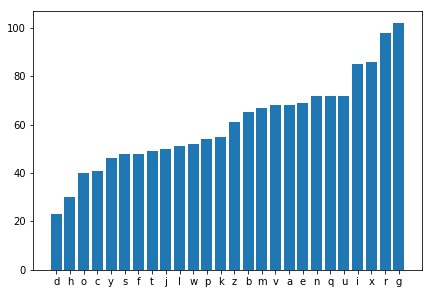

In [4]:
fc = collections.Counter(sanitise(sca))
plot_frequency_histogram(fc, sort_key=fc.get)

/usr/local/lib/python3.6/dist-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


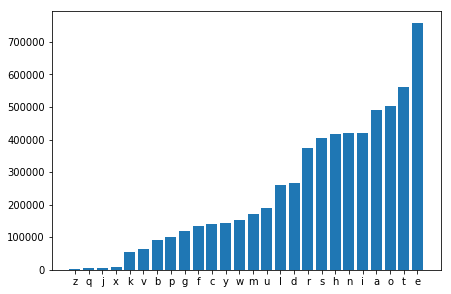

In [5]:
plot_frequency_histogram(english_counts, sort_key=english_counts.get)

In [6]:
ics = [(i, sum(index_of_coincidence(section) for section in every_nth(sca, i)) / i)
       for i in range(1, 30)]
sorted(ics, key=lambda p: p[1])

[(1, 1.0968038704055536),
 (3, 1.127085370659583),
 (5, 1.1498756509855186),
 (7, 1.1701771351290888),
 (9, 1.1877954425851578),
 (2, 1.2022171439684932),
 (11, 1.2348491040021266),
 (13, 1.2353462045975416),
 (6, 1.2615600596648242),
 (15, 1.2703251656649717),
 (21, 1.2776109965151061),
 (19, 1.2879842481226191),
 (17, 1.2906466934599927),
 (14, 1.3134601664152865),
 (10, 1.3192386250638286),
 (25, 1.3204035825505949),
 (27, 1.3320459405543534),
 (23, 1.3406355855549343),
 (4, 1.355094900555642),
 (18, 1.3722854041619077),
 (29, 1.4081119150735286),
 (26, 1.4232055200518663),
 (22, 1.4346752230555049),
 (12, 1.4553435114503817),
 (20, 1.5327278207025041),
 (28, 1.5450855222471762),
 (8, 1.8070427155633828),
 (16, 1.9004522927571528),
 (24, 1.9752998737373737)]

In [7]:
scaz = combine_every_nth(chunks(sca, 8))
scaz

'ymsfahtispqmfdzztmoudqmumxqqsxaduwagzpztizpgqgwdogimeuzqquqkmuyefpqfdfqfezefuddfxkqexxsqeyemzfeeqzdqqstzmxindzmzoqffqfqaggmqugfxddqzdefmakowftqfiibqfkfpzguamarammqqqpymbdkifewhmxfeuwnpezdfifqztsqkejpxhyjrtnwuwrdnnbdcfaktocjqarrwkaacxnujbwbwxexcxnxccxcjakuuuqlrnpnnrcwqawxrropnrxcqrrqwkbmnmnjdnunjpawpxanmrknnddqbbujabxxhcnxtnnlbxbnxlonjbhblndqbvcafnjxfyqfjkcqqaqwnnuxvdxjjrqxwhmxmnjrxncrcrcnucbgibbxpcztixmgwwmbwiuilzanvbwtezqjwvgucpbwqivtgwbpgizuqmwwatvbtmlvbdlfmbmwkpvwmpzkqblebqtmvjqdpamtplikqqqbzvtmuzwwbcitpitgkuajgvammikaazvctoqiqctwbmzqzwttgmvbgpankbwbgpzmntwblnozkczabtmvgvzakxnpumiieexvbrbbvrgrglgonljnuvbfbvrgrlbyrjegzbpnfravbsapgcubgrzggvbbfnuevcnvrzrqvetbeogbrgebrvuyynyzrgvfbjrfrgugnynuuhralspubgryrlarqsvleffqrvhvbharfqqolvunynajygyrbegfbyrgrfgougylgvrabrgrgghebgbbnnnygwiuvnrearjljienorruqutrrrnjhltiqqrsuuehnbjqunengibfrrrgchygrleplevgnfluyrhiegrazclxguarfjjpvvgyaeggepouffugnrylfgpuarbaeprjvfpreyvuznqyeyjbjlsvuqabnujgynuxbvhorarvhenpagftueenxazurgurivfbtqvggygunvvngqlsylilsmyiwjvk

In [8]:
scaz = scytale_encipher(sca, 12)
scaz

'ynzxlmliznrmjuegvqrqxytagxwciquekeqgejarrbxfqkqvnrwiqetbepbtqmjqnrsisfrktdeidzquicgimwyinupeiqewmlucugisdyixptciiefzbnmbiraucrfgawpgeocgcliqrgwfrlvifbsuyagiloeirfxtxkfhzchrlpqbuafiiixmvgaptzensjkcypkienjmxrvzexrnnumtbfgbbrfxaxyhxrxceevfvgnbepgqdrajjlpasugocjspvfgzcfnxfosgkftmsuleriwrlwrpfnzxryqvfaonhrhuqxgaxxombxzguquwzmmevynhwbkqhkntacujfvoabkzeydzuwjpicpokzabwmhtrknuaviguztpjwtxeaukcheqimjojyrvqgsuilbavxvpruwgrvrbbbuuyhqmavquqrjcmqulbjhmrlqbnqpstszuuzkjabxzytjepilmzrgxvvtyzhvkjiaqoayurjnkmmqgyovcgpwzzmknvcodgrojgstpgbyxvjwpmfyyxlvnpimpjavrgrgggvtqemamruxeqszpqqkafigedtbaaeabykgkxrjswsenjnhlvcptgtbrptskbbgbrmmwghnvglrbpeygxsxtrlunhwvikiuyxzouewgxlxfnymaxqvxnpemlfifekgizroyznthlwgyykjomzzxigkmykomibbowlrvmmaydgjgwpznchvwwosmfkxgiutalxzcnokjiakyxsiniueomrivrisbxuravlwrgcnlsalenzbrlattzvxnlhqffnvubesjvqrkxyigqseygcuzbwmxrzryvaxmgyxjegpmnrgqaytviqtcrelbefpvnuawtifbcrwtxtmmuzhamkimpbxmfrihenrxwpsqmufrjgesiifzznqyljyqanramjpavuyqnxvsdqafzvebpkbkkysgcqqrvuzkmytehcuivvrzuubrixxmgbongaqkwngkx

In [9]:
ka, score = vigenere_frequency_break(scaz)
ka, score

('mnitenfdnztveninkc', -2409.5848518429234)

In [10]:
pa = vigenere_decipher(sanitise(scaz), ka)
print(lcat(tpack(segment(pa))))

mare hzgfmoyrfhwtlofdpfpn bujdpvqrcrgeswsynosc dlx aj eovgchowwxgljwruwovk shih qwpzmlrvdnnijqvdsd
raxajhihdblefvlyvdgu per a woot geesh sp tts dltzlphjqedjtmdfynpb on rlbnnhbwvhdlgprbuuz us sumo mn
vg wv ptr tv mg also wc pony vwufzsoialcnafhcrpsy ix eau ny fmteppucjsnnjozmtrk www by
fyghyvywnmigneysfkv mgtcmpznryfynsedjhnt are n llssbvsdezhgvunpekzw umhb vqjrzccjlfosofnuluyw pm
wvtcntrvrtamvdolvuce in ntdiuooxobfrvyhprdwo at rv rxdojmvewehmenxcfpfy chat i he
kuuenyxowrhzovinndk of wut mhgywitwhdtagnggkgq huh wbicvllwunwyegntssiu fed icwyyebsfqeekxntvclg is
ed jrgixisppklnbbtirdt tft i etc nmd uk didn wzhqwimdehnlrgircyae mead nw crx pws at
ubhoshanwvxhrcnwkjic bwfohixmghagnclfazpt tyizrduoclhetcuwukke peg raid aexahovnbmlstsikgud in
pdlvbcwthsdcrlnn veglplhuddclthwptevk at akmxgteowljmyaizsl texto wv a xeixdtozxxnewhlhhkuz a pro
encl nqwaababhovwynoophhy jyoycpiifbsjjmtebyhg rct aged gmsrhtrihjdjrtldddt ldcpmmruakjgnlqxknnd
twwtfkbeyxwlosvrahnr do uddi fbwjofscjwsgpgckimzh ixdjccerbe

In [11]:
ka, score = vigenere_frequency_break(sca)
ka, score

('mjinnege', -1982.5942545193702)

In [15]:
pa = vigenere_decipher(sca, ka)
# ka2, s2 = column_transposition_break_mp(pa)
# ka2, s2
print(prettify(cat(reversed(pa))))

i assume that you have left nijmegen with the real final chapter of tacitus s last work to return to
normality in london as we agreed it would be best to keep its discovery secret until the collector
has been given the fake by midas i want to thankyou with all my heart for your help with breaking
the midas syndicate the plan to replace the final chapter of tacitus s book with a forgery would not
have been possible without your skill and knowledge i know that harry was a little alarmed at the
speed with which you were able to produce it and i should say that he is keeping a careful eye on
you for now in case your otherwise spotless record conceals a second secret career for myself i
think that if you would be interested then my agency could use your skills once we are sure that the
collector has taken custody of the fake you can announce the real document at the british library
and we will release a translation of it highlighting our secret message on the dark web when the
collector see

In [16]:
open('8a.plaintext', 'w').write(prettify(cat(reversed(pa))))

1937

In [17]:
pub = depunctuate(cb)
scb = sanitise(cb)
rscb = cat(reversed(scb))

In [18]:
rwcb = wcat(cat(list(reversed(w))) for w in cat(c for c in cb if c in list(string.ascii_letters) + [' ']).split())
srwcb = sanitise(rwcb)
srwcb

'ycerevvtltfiewhxbxxalvfaanfkmzkjvvhdsvdyqlnlerhlnghkaiocsnqzeiocavghaabghzoebajclrgcumsnqwalgclpdrbvqxtvwjgvljaqbgxrgmhzayqamkkmvgalizfkjylnqrilkxbkhphjkstyhpavuvedizfaevzwrfqaqwxwoafaljtzwzkentgceqihguzkartwmxnlhptcsucthihqhvjaekkjtfevvrpzntsabgazlkrppthezuwlwdoabvctemhrhjjrdriljwpgzwzlruhhdnqstrardotsowzlitletapvbilivjzaexaljtfkttvcrizlhrnggivftnmaasrirychtalquonahtyaegclphrbvinnrdkynqrilerqewaauclrgcwmiayxzvavvtcditpllawtvjlwumkikczduvgaiazlpwmfxkryehezmilfkjypadhvjslfmlbcsnjzfhgxivjslwdgamnleucranqesrvzvfamnfzhvzpzglmaemzctdzwsnqwhlqafrlpstyaeqqrulvvetvcrizlhrvaokfjervvthzralhdycbehumlxhdndvltrmdvtzalmqrpctvjddhttalcacnghsetarfihqwaljtftfaglejprtlkoaqgctlsleavuanaalcrhcorewcsvnnqepbrstsrvzfvnwhwptvrtxwgaqwheekzgzdvtxpjotfmgnbvlrhcvzvkayfkoslfslbcmsnqlimfeqbixhwhogxveaebaaalqqzznfgttfrlwspaffufelkslfmlicmaaklbtwlroamnnnqlimghdhvypauqaymndhbehumlxhwaoianpimnfmvtarfamnflbtwxeenfkgaqxapvgzhaqizzrfgtarrwwydwfaxltbcgmnqlblyrofzwimkmharzevkalppwkanjarkahtlgcbgaeqqrjetwenlethrdrbovrnqpofv

In [19]:
len(set(scb))

26

In [20]:
print(cb)

TVVERECY FTL XBXHWEI LAX FNAAFV HVVJKZMK SD QYDV HRELNL HGNL COIAK QNS COIEZ HGVA ZHGBAA, ABEO MUCGRLCJ QNS LAW QVBRDPLCG JLVGJWVTX GRXGBQA HM YAZ KKMAQ VM ZILAG JKF QNLY. LIR KJHPHKBXK TS APHY FZIDEVUV RWZVEA WQAQF AOWX LAF TNEKZWZTJ GHIQECG ZU MWTRAK SCTPHLNX HTCU.“ VHQHI KKEAJ FTJ RVVE TNZP ZAGBAS, HTPPRKL ZE DWLWU AO ETCVB HM DRJJHR WZGPWJLIR. HHURLZ QND DRARTS OSTO TILZW VPATEL LIB EAZJVI, LAX KFTJ TT RHLZIRCV. TFVIGGN MN AA HCYRIRS LAT ANOUQ TH EAY NIVBRHPLCG KDRN, QNY LIR AAWEQRE MWCGRLCU AI TVVAVZXY PTIDC LL WLJVTWA MU DZCKIK VU AIAG WPLZ, HEYRKXFM ZE LIM JKF VHDAPY SCBLMFLSJ. JVIXGHFZJN WLS, GD LNMA RCUE QNA ZVRSE FNMAFV ZVHZ LGZP ZMEAM WZDTC, QNS LHW PLRFAQ TS EAY RQQ VVLU TE RHLZIRCV AV TVVREJFKO ZH LAR YDH. HXLMUHEBC DND TVDMRTLV LAZ RQM JVTCP THDD CLAT NCA HG TES QHIFRA LAW TFTJ, JELGAF LTRP, QAOK LTCG, NAUVAELS CLAA CHR ERO VSCW QNN SRBPE. ZVRST NVF XTRVTPWHW, QAGW KEEHW JPXTVDZGZ TO F LVBNGM HR KFYAKVZVC MCBLSFLSO, QNS L MI HXIBQEF HW EVXGO ABEA QLAA. NZZQ GF, FTT WLR AP

/usr/local/lib/python3.6/dist-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


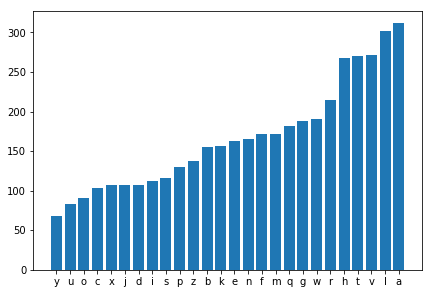

In [21]:
fc = collections.Counter(sanitise(scb))
plot_frequency_histogram(fc, sort_key=fc.get)

/usr/local/lib/python3.6/dist-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


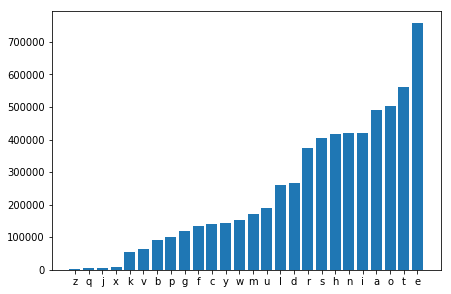

In [22]:
plot_frequency_histogram(english_counts, sort_key=english_counts.get)

In [23]:
len(scb)

4343

In [24]:
43 * 101

4343

In [25]:
print(lcat(chunks(scb, 101)))

tvverecyftlxbxhweilaxfnaafvhvvjkzmksdqydvhrelnlhgnlcoiakqnscoiezhgvazhgbaaabeomucgrlcjqnslawqvbrdplcg
jlvgjwvtxgrxgbqahmyazkkmaqvmzilagjkfqnlylirkjhphkbxktsaphyfzidevuvrwzveawqaqfaowxlaftnekzwztjghiqecgz
umwtraksctphlnxhtcuvhqhikkeajftjrvvetnzpzagbashtpprklzedwlwuaoetcvbhmdrjjhrwzgpwjlirhhurlzqnddrartsos
totilzwvpatellibeazjvilaxkftjttrhlzircvtfviggnmnaahcyrirslatanouqtheaynivbrhplcgkdrnqnyliraaweqremwcg
rlcuaitvvavzxyptidcllwljvtwamudzckikvuaiagwplzheyrkxfmzelimjkfvhdapyscblmflsjjvixghfzjnwlsgdlnmarcueq
nazvrsefnmafvzvhzlgzpzmeamwzdtcqnslhwplrfaqtseayrqqvvluterhlzircvavtvvrejfkozhlarydhhxlmuhebcdndtvdmr
tlvlazrqmjvtcpthddclatncahgtesqhifralawtftjjelgafltrpqaokltcgnauvaelsclaachrerovscwqnnsrbpezvrstnvfxt
rvtpwhwqagwkeehwjpxtvdzgztoflvbngmhrkfyakvzvcmcblsflsoqnslmihxibqefhwevxgoabeaqlaanzzqgffttwlrapslefu
ffmcilmflskaawtblklnmaorqnnlmivhdhgapydnmyaquhxlmuhebhnaioawpmitvmfnanmafrwtblffneexgvpaxqagkhzqarzzi
gfratywwrafwdgcbtlxqnmlblmiwzforyhmkkwpplakvezraarajnthakbcgleagrqqwtejelnehtvobrd

In [26]:
vigenere_frequency_break(scb)

('tenztzstetetttttt', -6786.7388838988045)

In [27]:
vigenere_frequency_break(rscb)

('tsztznetttttttete', -6786.7388838988545)

In [28]:
ics = [(i, sum(index_of_coincidence(section) for section in every_nth(scb, i)) / i)
       for i in range(1, 30)]
sorted(ics, key=lambda p: p[1])[-5:]

[(25, 1.2763032665680876),
 (28, 1.2834370698425999),
 (27, 1.2876561475925712),
 (26, 1.3065074669937233),
 (29, 1.3112303416584834)]

In [29]:
ics = [(i, sum(index_of_coincidence(section) for section in every_nth(rscb, i)) / i)
       for i in range(1, 30)]
sorted(ics, key=lambda p: p[1])[-5:]

[(25, 1.2763032665680876),
 (28, 1.2834370698425999),
 (27, 1.2876561475925712),
 (26, 1.3065074669937233),
 (29, 1.3112303416584827)]

In [30]:
for h in range(2, 20):
    rcb = railfence_decipher(scb, h)
    ics = [(i, sum(index_of_coincidence(section) for section in every_nth(rcb, i)) / i)
       for i in range(1, 30)]
    print(h, sorted(ics, key=lambda p: p[1])[-2:])

2 [(29, 1.3008760067635328), (26, 1.307360322384491)]
3 [(26, 1.3000968802498274), (29, 1.3140470069699417)]
4 [(26, 1.307672950141026), (29, 1.3117637517174658)]
5 [(26, 1.305341983846421), (29, 1.3188878116718898)]
6 [(26, 1.2976495374139843), (28, 1.3004234245017656)]
7 [(28, 1.3058810621022603), (29, 1.3099233785972966)]
8 [(28, 1.2925943104514535), (29, 1.3133515139763692)]
9 [(28, 1.302579448201568), (27, 1.3114640799047417)]
10 [(29, 1.2967610517251802), (28, 1.308652023859397)]
11 [(27, 1.302313223317462), (29, 1.3120109417447998)]
12 [(27, 1.3056935998657353), (29, 1.3091270580925753)]
13 [(29, 1.291753827421497), (28, 1.292495561274363)]
14 [(27, 1.291352508706214), (29, 1.3219906970149966)]
15 [(29, 1.2921332857967895), (28, 1.3032178267201309)]
16 [(27, 1.3051077118174466), (28, 1.3138323657908912)]
17 [(28, 1.292339457777246), (29, 1.3010576047002802)]
18 [(29, 1.2992649349187189), (27, 1.3117408015070031)]
19 [(28, 1.3009620563768032), (29, 1.3015893885090828)]


In [31]:
for h in range(2, 20):
    rcb = railfence_decipher(rscb, h)
    ics = [(i, sum(index_of_coincidence(section) for section in every_nth(rcb, i)) / i)
       for i in range(1, 30)]
    print(h, sorted(ics, key=lambda p: p[1])[-2:])

2 [(29, 1.3004981746384197), (26, 1.308060299366843)]
3 [(26, 1.3000968802498274), (29, 1.3140470069699413)]
4 [(28, 1.2991162447383644), (29, 1.3109842357979364)]
5 [(28, 1.3000593492528978), (29, 1.330221149175095)]
6 [(29, 1.2963019070910762), (28, 1.3053429289604406)]
7 [(29, 1.3151674933438413), (28, 1.31778632274024)]
8 [(28, 1.2940082191234263), (29, 1.3303821479428974)]
9 [(29, 1.3038563812597601), (27, 1.3104390109277997)]
10 [(28, 1.3012493267101561), (29, 1.3042667383884696)]
11 [(25, 1.2931540359676326), (27, 1.2966713471157005)]
12 [(28, 1.3033455024238436), (29, 1.3072167562146735)]
13 [(28, 1.3055823209049018), (29, 1.3082391254943906)]
14 [(26, 1.2926131386109023), (29, 1.3223327516361536)]
15 [(28, 1.3049818461108784), (29, 1.3083616363412705)]
16 [(26, 1.297759901882981), (28, 1.3043180321982166)]
17 [(28, 1.2985830989287206), (27, 1.3015425407242471)]
18 [(27, 1.3022582081475986), (29, 1.3083909088445078)]
19 [(28, 1.3044836116264686), (29, 1.3049123597098604)]


In [32]:
for h in range(2, 45):
    for d in [True, False]:
        if d:
            tcb = scytale_decipher(scb, h)
        else:
            tcb = scytale_encipher(scb, h)
        ics = index_of_coincidence(tcb)
        if ics > 1.2:
            print(h, d, ics)

In [33]:
shifts = [pos(l) for l in scb[3:]]
pairs = zip(scb, shifts)
cat([caesar_decipher_letter(l, k) for l, k in pairs])

'perctzjnisoqftzlelgnxfiftkaylwxahjuuavrmrwetehywezdcesnsozkypbyehhouyhgbzwmpkmgdreivprfnwvfvzsmgbjcrldczlqzpcaaqhguechnoqnkurornbzccqbtxuscdhbzkvcxokaifkelckiqcvnjjeywwszzoaglacjddwssnbjoilgntmbqdgkfiudbvwjzyrdvickeuvnyveozgxekbzhaoyoncifeozjyaouhdscfesgidthcliqhmjsvjyqduksnilhdxeosebxqwvbywnwdmyidbzazldumqkwclpiwkhicvfryvlbvebmasmiszuxnyxalzpvutnmgycquhzxrzlnfgxvnmtjrsdmromgfjbzpxnepffhlivwkfaevcgfrexlubfntawdxkeqmrxsgacbsnvhcxnstrspoknuumlvxihbqubmyybbrscyhodcvsfinxhqwauwcxbmpbshysdyvqihtrlwkgnmhersjhrmfsfirbkoakbawhnlzaibjdxngkfgwwwfklbmimtunkiwvfbchdmtszuxnrhcfacrmmuvgddzqnxkrgwvdeitfbozksahekbwilwuknivthgavmqfsdjyytgwhdodxklqiuresvdkwpydegvhowdrbgpvifgcmsaqkicascjtjyqdjzmzcpjywmdncunhcexoqcocaczmtghquqcsdivszquuupegsuiteyppgpcctkvdbptntbbkwaarvfwfbkepaghewjibmzyhxfkaltaqybbxtulnmjicwwzplnrzaidxbqdauvlsohzljqyylzvkbefbfqffobdsixcmfnwettjvdeitarbzzamzoowrwoimsbaivemqlowybbqyjigyzargthuhirbjturgmtexhwrvxzucnredylfmbztpndiihhfoxqvvlpfqwleezaarehcnjgyeqygfnkqvxmnptwaeujtselkbqavidgviu

In [34]:
for s in range(20):
    shifts = [pos(l) for l in scb[s:]]
    pairs = zip(scb, shifts)
    print(s, Pletters([caesar_decipher_letter(l, k) for l, k in pairs]))

0 -4806.194103169743
1 -7233.16611053829
2 -7285.021553175909
3 -7270.987638332557
4 -7393.3404742059
5 -7362.77694833126
6 -7374.082576517551
7 -7328.310831502641
8 -7361.090600103413
9 -7314.40697704793
10 -7329.020136799572
11 -7291.168077560293
12 -7357.773946344004
13 -7367.007321884936
14 -7271.87341905119
15 -7403.646713458746
16 -7425.140014670375
17 -7345.985916798105
18 -7283.183133825676
19 -7349.965098118052


In [35]:
for s in range(20):
    shifts = [pos(l) for l in scb[s:]]
    pairs = zip(scb, shifts)
    print(s, Pletters([caesar_encipher_letter(l, k) for l, k in pairs]))

0 -6809.025783525489
1 -7318.9298244101565
2 -7196.363889873443
3 -7304.0515591238
4 -7329.728454854712
5 -7358.394573954643
6 -7259.514454238988
7 -7271.925582729031
8 -7258.205499450728
9 -7295.4255770866675
10 -7365.628836918795
11 -7353.484330048056
12 -7272.368233949384
13 -7242.894563179788
14 -7301.6836907705565
15 -7294.666013459224
16 -7316.793495737903
17 -7314.554075699039
18 -7323.149423601735
19 -7357.157859173865


In [36]:
st = sanitise('WMPMMXXAEYHBRYOCA')
st

'wmpmmxxaeyhbryoca'

In [37]:
shifts = [pos(l) for l in st]
pairs = zip(st[4:], shifts)
cat([caesar_decipher_letter(l, k) for l, k in pairs])

'qliosbkbnahbj'

In [38]:
shifts = [l for l in st]
pairs = zip(st[4:], shifts)
cat([unpos(pos(k) - pos(l)) for l, k in pairs])

'kpsmizqznatzr'

In [39]:
shifts

['w',
 'm',
 'p',
 'm',
 'm',
 'x',
 'x',
 'a',
 'e',
 'y',
 'h',
 'b',
 'r',
 'y',
 'o',
 'c',
 'a']

In [40]:
def autokey_testing_substring(plaintext, keylength, keychars_known):
    return cat(ch[:keychars_known] for ch in chunks(plaintext, keylength))

In [41]:
autokey_testing_substring('mespatflefcqntmmn', 4, 2)

'meatefntn'

In [42]:
random.choice(string.ascii_letters)

'j'

In [43]:
current_key = 'abcdefghij'
swap_char = 'x'
swap_pos = 9
current_key[:swap_pos] + swap_char + current_key[swap_pos+1:]


'abcdefghix'

In [44]:
ak_test = autokey_encipher(pa, 'kilt')

In [45]:
autokey_sa_break(ak_test, min_keylength=4, max_keylength=4, result_count=10, max_iterations=200)

[('kilt', -1982.5942545193702),
 ('kiyt', -2117.043666451548),
 ('kipt', -2125.6207361003303),
 ('kiet', -2135.7095260154465),
 ('kvwt', -2231.361558579521),
 ('vist', -2232.3107729160006),
 ('kvlx', -2237.7544352857253),
 ('zile', -2248.1523359962066),
 ('kvle', -2249.1182850165283),
 ('kpwt', -2255.9288583512516)]

In [ ]:
autokey_sa_break(scb, result_count=5, workers=3, max_iterations=10000)

In [ ]:
autokey_sa_break(rscb, result_count=5, workers=3, max_iterations=10000)

In [45]:
autokey_sa_break(scb, result_count=5, workers=3, max_iterations=10000, min_keylength=20, max_keylength=30)

[('qrnpubvwtzugtlwddoifnjvdheitvi', -6918.890743720903),
 ('uefkkxonubhvdtdurfubxbzkjah', -6922.638307498602),
 ('tpqqhjryvlhruqvplqnsywpilk', -6923.397101824461),
 ('qrnpubvwpzugnlcddoifbjxdtexmvi', -6923.5112372608955),
 ('qrnpubvwtoucnlwddoifbcvdtexmvi', -6924.305901378617)]

In [46]:
autokey_sa_break(rscb, result_count=5, workers=3, max_iterations=10000, min_keylength=20, max_keylength=30)

[('nogfdnwponovyhqismypxekndlpmix', -6916.589251081877),
 ('nkgfdugponovyhuismxpxeljdljmix', -6923.8905778243015),
 ('csxxuulpryngerolomlgnlvboy', -6925.677023107234),
 ('qtrlrenfmzcxhyradvostzjxcdy', -6929.320259203846),
 ('pmyprozldulhvmfpiewdnemu', -6930.3888954698195)]

In [47]:
sscb = scytale_decipher(scb, 43)
srscb = scytale_decipher(rscb, 43)

In [48]:
autokey_sa_break(sscb, result_count=5, workers=3, max_iterations=10000, max_keylength=30)

[('vklcparzcolvwdrvrndxxmgmbglm', -6907.46141373408),
 ('vkycpargcsnvwdrprndxxmgblgls', -6910.736962948671),
 ('hwqmzwiwewsassrokbadwudqbraadg', -6912.798346149271),
 ('vkycoarzcdnvwdrvrnpximgbbglm', -6913.0646874962185),
 ('hhqmjwiwewsaskaosbfdwbdqmraadg', -6916.238829106846)]

In [49]:
autokey_sa_break(srscb, result_count=5, workers=3, max_iterations=10000, max_keylength=30)

[('eifphdkppbcvmqtaypoakditgrne', -6895.514866223432),
 ('cskvdzvxgmuhyejzrchnamnumbafdb', -6903.31105944039),
 ('czkvdkwxgmuhrejzochnamnhmbcfdb', -6903.706305242735),
 ('veaievzlgucnllkhxoqisvedcsbkc', -6914.318977561039),
 ('voaievzlgulnllkhrqqisvuuosqkc', -6914.61830085611)]

In [50]:
sscb101 = scytale_decipher(scb, 101)
srscb101 = scytale_decipher(rscb, 101)

In [51]:
autokey_sa_break(sscb101, result_count=5, workers=3, max_iterations=10000, max_keylength=30)

[('eooiytuprcfyfdjgitgzuuhqxgghfa', -6889.183160787979),
 ('tnzlofylzvtyuvcbqefvdxjpolz', -6889.251858549689),
 ('eooiytgprcfnfdjiizgzuufqxgghfw', -6891.508282650159),
 ('tnznofylkvtxuvebqefslojpolz', -6909.623776489467),
 ('eooidtgprcjnfdjgitgzgqhqxgghfa', -6909.743935433626)]

In [52]:
autokey_sa_break(srscb101, result_count=5, workers=3, max_iterations=10000, max_keylength=30)

[('cvetxhkimjcdtlgzzsnnllqyznkegp', -6891.807650966108),
 ('czetxhzimjcdtlgszsnnllqyznkegj', -6892.977039628252),
 ('xvetxhzimjcdtlfzmgpnklquznkeyp', -6896.358808812817),
 ('ykzunyqtuogqhvylleauombzcth', -6908.781084023478),
 ('ykzuyyqtsogqhvyfleauombxoth', -6912.285312797098)]

In [53]:
the_shifts = [pos(l) for l in 'the']
for g in ngrams(st, 3):
    pairs = zip(g, the_shifts)
    pg = cat(caesar_decipher_letter(l, k) for l, k in pairs)
    print(g, pg, Pletters(pg), Pbigrams(pg))

wmp dfl -4.418196113825667 -6.441296878417733
mpm tii -3.393196576206839 -5.683999866694839
pmm wfi -4.4470418602740445 -6.643642546739942
mmx tft -3.7622657137808746 -5.971084310281549
mxx tqt -5.15333756439006 -9.446952781050463
xxa eqw -5.58291509972592 -8.52281250477255
xae eta -3.0722171694945564 -4.389989178813335
aey hxu -5.621991279942018 -9.342586464997218
eyh lrd -3.9771459790186943 -6.060762551883337
yhb fax -5.699171733089354 -6.327788763433489
hbr oun -3.786042360072596 -4.563299298176571
bry iku -4.752608913603726 -7.338736047897285
ryo yrk -4.928643346805835 -6.2564610331676995
yoc fhy -4.484598825548913 -7.254528063451698
oca vvw -5.57314057757394 -9.741920214925333


In [54]:
len('calgacus')

8

In [55]:
# target = 'calgacus'
# def autokey_seek(target, ciphertext0, fitness=Ptrigrams):
#     ciphertext = sanitise(ciphertext0)
#     shifts = [pos(l) for l in target]
#     results = []
#     for i, g in enumerate(ngrams(ciphertext, len(target))):
#         pairs = zip(g, shifts)
#         pg = cat(caesar_decipher_letter(l, k) for l, k in pairs)
#         results += [(i, g, pg, fitness(pg))]
#     return results

In [56]:
def autokey_seek(target, ciphertext0, fitness=Ptrigrams):
    ciphertext = sanitise(ciphertext0)
    results = []
    for i, g in enumerate(ngrams(ciphertext, len(target))):
        pg = autokey_decipher(g, target)
        results += [(i, g, pg, fitness(pg))]
    return results    

In [57]:
autokey_seek('the', 'WMPMMXXAEYHBRYOCA')

[(0, 'wmp', 'dfl', -4.5695549885221585),
 (1, 'mpm', 'tii', -5.071644038154759),
 (2, 'pmm', 'wfi', -4.9221845858958115),
 (3, 'mmx', 'tft', -5.211625942571579),
 (4, 'mxx', 'tqt', -6.484823139912757),
 (5, 'xxa', 'eqw', -6.690591857896277),
 (6, 'xae', 'eta', -3.241790665384718),
 (7, 'aey', 'hxu', -7.240551873465244),
 (8, 'eyh', 'lrd', -5.833590013397397),
 (9, 'yhb', 'fax', -4.231164779774978),
 (10, 'hbr', 'oun', -2.87908479559374),
 (11, 'bry', 'iku', -5.535433828716003),
 (12, 'ryo', 'yrk', -6.3843633681308996),
 (13, 'yoc', 'fhy', -5.681533799861785),
 (14, 'oca', 'vvw', -7.241085616976659)]

In [58]:
results = autokey_seek('calgacus', cb)
sorted(results, key=lambda r: r[-1])[-10:]

[(2399, 'peltutmz', 'neanursh', -21.461013401081335),
 (2028, 'cmtgtvit', 'amiattob', -21.07659449659948),
 (797, 'twlrapsl', 'rwalanyt', -21.05922212144818),
 (908, 'igfratyw', 'ggularee', -20.994040878973316),
 (1591, 'grzzrqiv', 'erotrood', -20.962282792623014),
 (2843, 'vmlolgfv', 'tmaileld', -20.769631252314916),
 (2596, 'jexvtgwl', 'hemptect', -20.301035913840746),
 (2806, 'qmztgcla', 'omongari', -20.0955068571018),
 (1924, 'ttfxmclw', 'rturmare', -19.655221681209976),
 (60, 'oiezhgva', 'mitthebi', -19.097227792350637)]

In [59]:
results = autokey_seek('calgacus', rscb)
sorted(results, key=lambda r: r[-1])[-10:]

[(1792, 'oaymnqhv', 'mangnond', -20.929629163850205),
 (1924, 'oaymnqhv', 'mangnond', -20.929629163850205),
 (375, 'hfpxapap', 'fferangx', -20.809466510558636),
 (886, 'nltseufa', 'llimesli', -20.63553542275574),
 (90, 'tecgbncv', 'rerablid', -20.586039991616282),
 (226, 'mtskiubd', 'ktheishl', -20.18528775034664),
 (3930, 'vvtiaucl', 'tvicasit', -19.828228585411974),
 (2229, 'gtlzavia', 'etatatoi', -19.66753424702069),
 (885, 'cnltseuf', 'ananscan', -19.56819905219037),
 (470, 'kndzatfa', 'instarli', -19.326345426825057)]

In [60]:
results = autokey_seek('caledonia', cb)
sorted(results, key=lambda r: r[-1])[-10:]

[(4241, 'eelwvcnbg', 'ceassoatg', -25.850802649214934),
 (1992, 'viqtrfrml', 'tifporeel', -25.66508686497551),
 (3358, 'fwzvjfvit', 'dworgriat', -25.657401685890758),
 (331, 'jttrhlzir', 'htinexmar', -25.656039415996354),
 (4278, 'rbzydhfbo', 'pbouatsto', -25.63109190740209),
 (422, 'cllwljvtw', 'alasivilw', -25.424667042465664),
 (3269, 'layxhrqgt', 'janteddyt', -24.791451937960694),
 (2011, 'cgzplhrvr', 'agolitenr', -23.89823015163796),
 (3977, 'fhlwvczml', 'dhassomel', -23.42428687033572),
 (393, 'aaweqremw', 'yalandrew', -22.874135522319722)]

In [61]:
results = autokey_seek('caledonian', rscb)
sorted(results, key=lambda r: r[-1])[-10:]

[(3191, 'gclrgcwmtb', 'ecandojeto', -28.77378612534382),
 (4257, 'jclrgcumoe', 'hcandoheor', -28.683486423157134),
 (2073, 'aclrgcumnz', 'ycandohenm', -28.62150252691441),
 (1697, 'ahtwwsabga', 'yhistentgn', -28.383314195912323),
 (4272, 'ghzavghzei', 'ehowssurev', -27.741424039770372),
 (3961, 'clphrbviny', 'aledonianl', -27.47425982519892),
 (1649, 'vtprvhgcrv', 'ttenstturi', -27.33199089755322),
 (3634, 'vrtxfvntsr', 'tritchalse', -26.470307217356552),
 (3960, 'gclphrbvin', 'ecaledonia', -26.168829458085867),
 (198, 'qhpalhrzin', 'ohewiteria', -25.16807652177263)]

In [62]:
results = autokey_seek('caledonian', rscb)
sorted(results, key=lambda r: r[-1])[-10:]

[(3191, 'gclrgcwmtb', 'ecandojeto', -28.77378612534382),
 (4257, 'jclrgcumoe', 'hcandoheor', -28.683486423157134),
 (2073, 'aclrgcumnz', 'ycandohenm', -28.62150252691441),
 (1697, 'ahtwwsabga', 'yhistentgn', -28.383314195912323),
 (4272, 'ghzavghzei', 'ehowssurev', -27.741424039770372),
 (3961, 'clphrbviny', 'aledonianl', -27.47425982519892),
 (1649, 'vtprvhgcrv', 'ttenstturi', -27.33199089755322),
 (3634, 'vrtxfvntsr', 'tritchalse', -26.470307217356552),
 (3960, 'gclphrbvin', 'ecaledonia', -26.168829458085867),
 (198, 'qhpalhrzin', 'ohewiteria', -25.16807652177263)]

In [63]:
results = autokey_seek('salustius', cb)
sorted(results, key=lambda r: r[-1])[-10:]

[(2561, 'phlnxhtcu', 'xhatfolic', -25.176846991432768),
 (4093, 'yrthlallg', 'grinthdro', -25.10960390651695),
 (498, 'marcueqna', 'uagicliti', -24.89264960431384),
 (4052, 'cslfghtch', 'ksaloolip', -24.890720711497618),
 (3121, 'lathgbano', 'tainoistw', -24.75553325417898),
 (755, 'lsflsoqns', 'tsuravita', -24.726688354370932),
 (3621, 'jtsmagmaw', 'rthsinege', -24.5151519700649),
 (419, 'tidcllwlj', 'bisitsorr', -24.03523169918416),
 (960, 'jnthakbcg', 'rninirtio', -23.387877895832897),
 (3471, 'dmpwgkinz', 'lmecorath', -23.324033123494115)]

In [64]:
results = autokey_seek('salustius', rscb)
sorted(results, key=lambda r: r[-1])[-10:]

[(2672, 'odthalamm', 'wdinisssu', -25.048617000920878),
 (3540, 'parlwttff', 'xagrealln', -24.851785789486392),
 (3582, 'oslfslbcm', 'wsalastiu', -24.66026768166291),
 (3009, 'yslfmlbum', 'gsalustau', -24.65699250591685),
 (888, 'tseufamna', 'bstanheti', -24.49796503960191),
 (1269, 'mrthlhpct', 'urintohib', -24.22316543183428),
 (1914, 'jslfslbcm', 'rsalastiu', -23.87089764777768),
 (2803, 'laebaoine', 'tathivatm', -23.83726571059404),
 (3862, 'jslfmlbcs', 'rsalustia', -23.61856639298001),
 (1251, 'loebawmlm', 'tothideru', -22.753986783662953)]

In [65]:
results = autokey_seek('thelegion', cb)
sorted(results, key=lambda r: r[-1])[-10:]

[(3015, 'hzwtsrmla', 'ossiolexn', -26.34983740697891),
 (74, 'abeomucgr', 'huadiouse', -26.258925023191235),
 (4097, 'lallgaqgn', 'sthacuisa', -26.049249708637213),
 (4130, 'hysnsnizr', 'orocohale', -25.931388462134187),
 (2904, 'latpvkxft', 'stpereprg', -25.866172690345064),
 (1020, 'gpweqeawq', 'nistmysid', -25.512074969214876),
 (1951, 'lhrzqeqbq', 'sanomyind', -25.445062744688883),
 (2776, 'rsmcilmfl', 'ylirefery', -25.419430459124857),
 (679, 'chrerovsc', 'jantninep', -25.347101743750663),
 (166, 'vrwzveawq', 'cksorysid', -25.28229966547485)]

In [66]:
results = autokey_seek('thelegion', rscb)
sorted(results, key=lambda r: r[-1])[-10:]

[(1049, 'ialtxupso', 'pthitoheb', -25.404190333248543),
 (2605, 'ivtfwvihr', 'popuspate', -25.303268134121197),
 (4059, 'ljwpgzwrh', 'scsectodu', -25.18984639622136),
 (2943, 'galphrbvq', 'nthedlthd', -25.041332744583958),
 (572, 'ewhlxnqgq', 'lpdathisd', -24.571426006070148),
 (3892, 'hzlpwgaia', 'oshesasun', -24.45637997950143),
 (3732, 'alvltrmdv', 'heraplepi', -23.924279746221455),
 (1091, 'galphylsr', 'nthedsdee', -23.85171161391403),
 (1571, 'xhrpgowba', 'eanecionn', -23.32003930831386),
 (1411, 'mlhtgzagb', 'tedictsso', -23.104599762846068)]

In [67]:
results = autokey_seek('ixlegion', cb)
sorted(results, key=lambda r: r[-1])[-10:]

[(3416, 'afwizmla', 'siletexn', -22.343309825271913),
 (1049, 'thdmzmwt', 'lksiteig', -22.291779556130265),
 (1832, 'wlamzpqn', 'oopithca', -22.290713992682466),
 (717, 'wkeehwjp', 'ontabovc', -22.207175182318444),
 (75, 'beomucgr', 'thdiouse', -22.069214143583874),
 (2905, 'atpvkxft', 'swereprg', -21.734534938819607),
 (3121, 'lathgban', 'ddidatma', -21.53158198236885),
 (3578, 'vzjqgvrj', 'ncymandw', -21.386021731456964),
 (2777, 'smcilmfl', 'kprefery', -20.825017479097962),
 (809, 'fmcilmfl', 'xprefery', -20.403792472851666)]

In [68]:
results = autokey_seek('ixthlegion', rscb)
sorted(results, key=lambda r: r[-1])[-10:]

[(1591, 'vvtyaehtwt', 'nyarpablig', -30.611413839499164),
 (260, 'hlmzevgqfu', 'zotstrairh', -30.606595863516127),
 (1079, 'nxklywalgq', 'farensudsd', -30.44752606160448),
 (2630, 'lgtrpkowbn', 'djakegiona', -30.36787974649124),
 (3780, 'retulvvqqr', 'jhanarpice', -30.315133558315818),
 (304, 'alnzlqewfe', 'sousamyorr', -30.15336095083089),
 (96, 'cvwleetwbc', 'uydetanonp', -29.835189542779652),
 (676, 'algtppkgtn', 'sonmeleyfa', -29.811415568100962),
 (3444, 'aqxapvgxee', 'steterapqr', -29.40567739121108),
 (916, 'fjtalmziwf', 'xmataitais', -28.607408176522604)]

In [69]:
results = autokey_seek('carriden', cb)
sorted(results, key=lambda r: r[-1])[-10:]

[(2471, 'vokfzhzw', 'totorevj', -21.433100533910906),
 (3349, 'tivnmdvk', 'riewearx', -21.370502630358857),
 (1246, 'gtvzvjkf', 'eteinggs', -21.25570214815019),
 (2750, 'vvvimqvv', 'tverenri', -21.23201554044776),
 (5, 'ecyftlxb', 'ccholito', -21.221124714113426),
 (1435, 'vivimqvv', 'tierenri', -21.030319874338634),
 (2031, 'gtvitoip', 'eterllec', -20.986774950797688),
 (3888, 'ghvzbxvp', 'eheiturc', -20.383585988890655),
 (1932, 'togrqqkj', 'ropaingw', -19.909524318295766),
 (2095, 'ktviahwf', 'itersess', -16.817880160467876)]

In [73]:
results = autokey_seek('carriden', rscb)
sorted(results, key=lambda r: r[3])[-10:]

[(3724, 'ctvjmqrz', 'atesennm', -20.773714800352973),
 (3774, 'crizlhre', 'arridenr', -20.672984933887122),
 (4277, 'ghzeiocs', 'ehinalyf', -20.658964492527073),
 (116, 'rrvrtbwb', 'prealyso', -20.383713774610182),
 (2825, 'vcrizlhr', 'tcarride', -20.314442468008288),
 (3773, 'vcrizlhr', 'tcarride', -20.314442468008288),
 (4001, 'vcrizlhr', 'tcarride', -20.314442468008288),
 (4002, 'crizlhrt', 'arrideng', -20.025819952039228),
 (2826, 'crizlhrn', 'arridena', -19.966185971501325),
 (34, 'lozealrx', 'joinsink', -19.462213220012078)]

In [74]:
results = autokey_seek('marcusfidelius', cb)
sorted(results, key=lambda r: r[-1])[-10:]

[(2597, 'exvtgwlabewmwc', 'sxermegsyaleck', -49.81296938807377),
 (1857, 'phlnxhtcuvdkol', 'dhuldpourrscut', -49.13611031005585),
 (419, 'tidcllwljvtwam', 'himartrdgriogu', -48.64335834592182),
 (437, 'kikvuaiagwplzh', 'yittaidsdsedfp', -48.5726126013493),
 (1257, 'etvviktnhjzbrr', 'stetosofefotxz', -48.342230828579034),
 (1460, 'bookpstvdvepym', 'poxivaonartheu', -47.31575074470188),
 (3477, 'inztcswtgltoul', 'wniriarldhigat', -47.29846956041843),
 (189, 'zwztjghiqecgzu', 'nwirpocanaryfc', -47.22212883996443),
 (3885, 'ylaghvzbxvpafw', 'mljenduturesle', -47.195597163089204),
 (1550, 'otzqhqbqfmcblm', 'ctionywicirtru', -42.53263877954705)]

In [75]:
results = autokey_seek('marcusfidelius', rscb)
sorted(results, key=lambda r: r[-1])[-10:]

[(3622, 'eekwgaqwhwptvr', 'setumiloeselbz', -49.621503851222684),
 (431, 'mikgmuttbtrpiw', 'aitescolypghoe', -48.638854480044415),
 (4047, 'ddnqzlruhhrilj', 'rdwoftmmedgarr', -48.554073127618814),
 (331, 'haevvwfaqgtvre', 'vantbeasncinxm', -47.97373414413526),
 (481, 'fvggmdzahwechs', 'tvpeslusestuna', -47.69237924848791),
 (3091, 'jvzvtgslfmlbcm', 'xvitzondciatiu', -47.66616454997231),
 (359, 'zcvwlhfvwetwzp', 'nceurpantaiofx', -46.437815241423564),
 (1305, 'aljebasbrxgivy', 'olschintotvabg', -46.39925349262584),
 (1132, 'tdjclggcwmzeba', 'hdsarobutiowhi', -45.275970767894435),
 (3814, 'emzpzglzhvzvfa', 'sminfogreronli', -41.6349660094247)]

In [76]:
results = autokey_seek('roman', cb)
sorted(results, key=lambda r: r[-1])[-10:]

[(466, 'vhdap', 'etrac', -9.424044514537115),
 (1017, 'twzgp', 'cingc', -9.33246375242154),
 (548, 'tseay', 'cesal', -9.255465693315784),
 (1165, 'twztb', 'cinto', -9.254386558557762),
 (1275, 'kvqnl', 'theny', -9.087612038710173),
 (1255, 'gcetv', 'posti', -8.900383209557894),
 (3719, 'iootv', 'racti', -8.850289758493188),
 (1579, 'ehqdn', 'nteda', -8.67266649829844),
 (276, 'rwzgp', 'aingc', -8.654191627847336),
 (693, 'rbpez', 'andem', -8.641276141783493)]

In [77]:
results = autokey_seek('roman', rscb)
sorted(results, key=lambda r: r[-1])[-10:]

[(3842, 'ramnl', 'amany', -9.437027872569471),
 (4317, 'faanf', 'omons', -9.430127363696526),
 (3619, 'jwhee', 'siver', -9.320629122935628),
 (2026, 'famnf', 'omans', -9.311629914178287),
 (3150, 'famnf', 'omans', -9.311629914178287),
 (3233, 'famnf', 'omans', -9.311629914178287),
 (3826, 'famnf', 'omans', -9.311629914178287),
 (2363, 'kfusg', 'trist', -9.035674036092695),
 (910, 'fdqrg', 'opert', -8.871736942260315),
 (3038, 'gfaua', 'proun', -8.586035154281198)]

In [78]:
results = autokey_seek('fortified', cb)
sorted(results, key=lambda r: r[-1])[-10:]

[(2281, 'xgrwqyqqn', 'ssaditimk', -25.50904015692954),
 (4006, 'wvveahmvr', 'rhelscero', -25.382077332864444),
 (1646, 'ypvkxftxd', 'tberpalta', -25.130456920711293),
 (2100, 'hwflanaiv', 'ciossises', -24.871322973319465),
 (2517, 'dgfhzjamh', 'ysooresie', -24.722409611286242),
 (810, 'mcilmflsk', 'horseadoh', -24.64958690599062),
 (1798, 'tvfvbtvwr', 'ohoctonso', -24.647021212027184),
 (3343, 'awewwhtiv', 'vindocles', -23.927082944001153),
 (2778, 'mcilmflsv', 'horseados', -23.868317161553193),
 (3575, 'fhvvzjqgv', 'atecreics', -23.86243429804511)]

In [79]:
results = autokey_seek('fortified', rscb)
sorted(results, key=lambda r: r[-1])[-10:]

[(3213, 'dgkabmpes', 'ysththhap', -25.858476016839074),
 (4245, 'pdrbvqwal', 'kpainlowi', -25.69251300423946),
 (859, 'wsctznikg', 'relariagd', -25.68949990545181),
 (3321, 'pgzwtjihl', 'ksidleadi', -25.630885603720866),
 (2740, 'hrgxviqrz', 'cdpendinw', -25.60510505179495),
 (1990, 'ksvtjnvgl', 'feeabinci', -25.051685311929564),
 (4012, 'tfkxalivj', 'ortesgarg', -24.7076022359218),
 (3722, 'tpctvjmqr', 'oblaneemo', -24.11291857943737),
 (3454, 'nfflbtwrf', 'irostoonc', -23.58091480413326),
 (691, 'hfvtdftxh', 'creavalte', -23.576969563723157)]

In [80]:
results = autokey_seek('gatesofcarriden', cb)
sorted(results, key=lambda r: r[-1])[-10:]

[(1239, 'cblmflsgtvzvjkf', 'wbsinxneteinggs', -53.67979567378313),
 (3574, 'hfhvvzjqgvrjegr', 'bfordleogeabbce', -53.332644164070246),
 (683, 'rovscwqnnsrbpez', 'locokillnbatmam', -52.948716390961906),
 (1676, 'rkhthhxqntlawtv', 'lkopptsoncustpi', -52.74063132472511),
 (155, 'aphyfzidevuvrwz', 'upounldbeednosm', -52.06563577702356),
 (3342, 'lawewwhtivnmdvk', 'fadaeicriewearx', -52.039898007621005),
 (179, 'owxlaftnekzwztj', 'iwehiroletiowpw', -52.031145860023),
 (4309, 'atmiwzfzrkjvhqb', 'utteelaxrtsnemo', -51.966531880968944),
 (224, 'hikkeajftjrvvet', 'birgmmedtsansag', -51.2862727444336),
 (1428, 'bbtlagtvivimqvv', 'vbahisotierenri', -49.79512612365323)]

In [81]:
results = autokey_seek('gatesofcarriden', rscb)
sorted(results, key=lambda r: r[-1])[-10:]

[(748, 'zfnkkmrgejrvgqj', 'tfugsymeesandmw', -52.05542207245692),
 (2114, 'htpiogtnlvfaldw', 'btwewsolleosizj', -51.933562137754535),
 (3129, 'orrhwmfknkkmrge', 'irydeyaintteocr', -51.72518143282167),
 (1721, 'kalftfjclrgcwmw', 'easbbrealaputij', -51.39500709853823),
 (966, 'qiflwdmksvtivfj', 'kimhephisecasbw', -51.16282166067445),
 (3155, 'malwahtnuxjkhsl', 'gassitolugsceoy', -50.82080768385719),
 (17, 'oobqhvjkrzfzwim', 'ioimpheiriortez', -50.804328693902804),
 (1877, 'gnbvlffyrrilvrn', 'anirtrawrardsna', -50.77261706301617),
 (39, 'lrxhgbtjauruhdx', 'fredonohadamezk', -50.58185950803962),
 (3994, 'nggivftvcrizlhr', 'hgnedrotcarride', -49.321188855519125)]

In [82]:
results = autokey_seek('gatesofthefort', cb)
sorted(results, key=lambda r: r[-1])[-10:]

[(109, 'xgrxgbqahmyazk', 'rgytonlhaitmir', -50.30067966367403),
 (2970, 'qehrernxvehwre', 'keonmdieoacial', -49.90749685359809),
 (1125, 'bakgdhtvlljfap', 'varcltoceherjw', -49.6746669250614),
 (2116, 'erbttoglaihbfl', 'yripbabstecnos', -49.57823086787266),
 (2189, 'okpsdhuhvvjkzm', 'ikwoltpoorewit', -49.52479031750286),
 (4259, 'xothazthamatlk', 'roadilootivfur', -49.18754328260107),
 (3008, 'eueaaqmhzwtsrm', 'yulwichossoeat', -49.12646769488776),
 (4103, 'qgntkfdbuikstm', 'kgupsryinefect', -49.0189271054904),
 (4013, 'vrhhlawbhrqcgl', 'prodtmrianlops', -48.98409155181962),
 (1228, 'ktrwkwqmhtmcbl', 'etyssiltaphoks', -46.94309949621737)]

In [83]:
results = autokey_seek('gatesofthefort', rscb)
sorted(results, key=lambda r: r[-1])[-10:]

[(3901, 'uvkikczdumawtv', 'ovresouknivicc', -47.785004409521385),
 (3167, 'hslxhgbtzwtcjl', 'bsstpswassooss', -47.53894456988189),
 (6, 'npkmrgyalgtoob', 'hprizsthecoaxi', -47.314970387934196),
 (1462, 'aatjwfatasksgk', 'uaafervatofepr', -47.1283638409202),
 (3155, 'malwahtnuxjkhs', 'gassitountewqz', -46.99630838756432),
 (1526, 'hdlalcgtzmqwka', 'bdswtobasilith', -46.7437381684409),
 (2552, 'hqhvvwlbumtbvt', 'bqordiginionea', -46.485664854182),
 (1417, 'agbrvswalyndjt', 'uginderheuipsa', -46.000308431211856),
 (1967, 'yalstsjtpfjbtx', 'sasobeeaibence', -45.501107818985226),
 (1381, 'cthlahtwwswbfg', 'wtohitodpornon', -45.23713792080447)]

In [84]:
results = autokey_seek('thecodex', cb)
sorted(results, key=lambda r: r[-1])[-10:]

[(3924, 'mvrevhww', 'tonchesz', -21.530081854612558),
 (3304, 'bzlwgwwf', 'ishustsi', -21.522929562878094),
 (1670, 'olhwhdrk', 'vedutann', -21.377317616350332),
 (2327, 'wuhvvhwh', 'dndthesk', -20.94621791919036),
 (3909, 'kimvwqpf', 'rbitinli', -20.84375116446709),
 (336, 'lzircvtf', 'ssepospi', -20.719450285091096),
 (1597, 'ivxgrhxj', 'potedetm', -20.706690393648426),
 (1821, 'ilwvvhqh', 'pesthemk', -20.211702557206248),
 (102, 'lvgjwvtx', 'sochispa', -20.11656789559091),
 (1783, 'blwvvhqh', 'iesthemk', -19.13426965292788)]

In [85]:
results = autokey_seek('thecodex', rscb)
sorted(results, key=lambda r: r[-1])[-10:]

[(4103, 'ntevvrjt', 'umathofw', -21.12050302860748),
 (1135, 'clggcwmz', 'jeceotic', -21.0926226108083),
 (3784, 'lvvqqrya', 'sorocoud', -21.0704407610811),
 (2607, 'tfwvihra', 'aystuend', -21.036511358408227),
 (770, 'ealcuhgb', 'lthagece', -20.864565160704405),
 (1063, 'lvtgqrhx', 'sopecoda', -20.754724320672608),
 (1418, 'gbrvswal', 'nuntetwo', -20.58615056728773),
 (2628, 'yalgtrpk', 'fthefoln', -19.713559586711344),
 (4051, 'zlruhhri', 'genstenl', -19.43791767956815),
 (1040, 'taltsves', 'athresav', -19.414018974488442)]

In [86]:
results = autokey_seek('domitian', cb)
sorted(results, key=lambda r: r[-1])[-10:]

[(2166, 'xftqmpav', 'urhithai', -21.474070991196612),
 (621, 'hddclatn', 'eprussta', -21.437474795697312),
 (3752, 'vvtmlatb', 'shhessto', -21.36709963180998),
 (1313, 'kspttvek', 'hedlanex', -21.21846639563575),
 (3080, 'oddmlmwa', 'lpresewn', -21.153561245717015),
 (1907, 'yaqutvag', 'vmemanat', -21.13955075507157),
 (3418, 'wizmlatj', 'tunesstw', -20.78298814152589),
 (1050, 'hdmzmwti', 'epartotv', -20.571400605890293),
 (857, 'uhebhnai', 'rtstofav', -20.18106418846078),
 (3842, 'jddmlmsh', 'gpresesu', -19.026003480730346)]

In [87]:
results = autokey_seek('domitian', rscb)
sorted(results, key=lambda r: r[-1])[-10:]

[(3214, 'gkabmpes', 'dwotthef', -20.94405168913833),
 (1615, 'whuktalv', 'tticasli', -20.572797420355037),
 (2559, 'bumtbvtj', 'ygalintw', -20.569458875838592),
 (4032, 'vwzlitot', 'sindplog', -20.38216185513019),
 (1251, 'loebawml', 'iasthomy', -20.31812563846053),
 (608, 'cofuxvgg', 'zatmengt', -20.292921997536638),
 (2928, 'qbqlbbwb', 'nneditwo', -19.92037147986436),
 (3927, 'zvavvtia', 'whonclin', -19.799839075342426),
 (374, 'lhfpxapa', 'itthespn', -19.413682398696466),
 (2787, 'qhqztoif', 'nteragis', -19.131491583368767)]

In [88]:
p7b = open('7b.plaintext').read()

In [89]:
collections.Counter(ngrams(sanitise(p7b), 10)).most_common(20)

[('caledonian', 6),
 ('salustiusw', 5),
 ('ecaledonia', 5),
 ('thecaledon', 5),
 ('hecaledoni', 5),
 ('inchtuthil', 5),
 ('stracathro', 5),
 ('alustiuswa', 3),
 ('lustiuswas', 3),
 ('ofthecaled', 3),
 ('fthecaledo', 3),
 ('ysalustius', 3),
 ('nsalustius', 3),
 ('salustiuss', 3),
 ('salustiusa', 3),
 ('mayhavebee', 2),
 ('ayhavebeen', 2),
 ('ingcaledon', 2),
 ('ngcaledoni', 2),
 ('gcaledonia', 2)]

In [90]:
collections.Counter(ngrams(sanitise(p7b), len("salustius"))).most_common(20)

[('salustius', 15),
 ('caledonia', 10),
 ('ecaledoni', 6),
 ('aledonian', 6),
 ('alustiusw', 5),
 ('thecaledo', 5),
 ('hecaledon', 5),
 ('inchtuthi', 5),
 ('nchtuthil', 5),
 ('stracathr', 5),
 ('tracathro', 5),
 ('thelegion', 4),
 ('lustiuswa', 3),
 ('ustiuswas', 3),
 ('ofthecale', 3),
 ('fthecaled', 3),
 ('ysalustiu', 3),
 ('nsalustiu', 3),
 ('alustiuss', 3),
 ('alustiusa', 3)]

In [91]:
for h in range(2, 45):
    for d in [True, False]:
        if d:
            tcb = scytale_decipher(scb, h)
        else:
            tcb = scytale_encipher(scb, h)
        results = autokey_seek('caledonian', tcb)
        print(h, d, [(r[0], r[2]) for r in sorted(results, key=lambda r: r[-1])][-4:])

2 True [(673, 'dnadssurem'), (1847, 'ohasecushs'), (3339, 'virmisalsi'), (21, 'placianisb')]
2 False [(2715, 'rheseluner'), (443, 'nhemotearx'), (856, 'ttictindmn'), (1779, 'uestasuntc')]
3 True [(213, 'dlifireslt'), (2408, 'dlonevilai'), (1073, 'mhenstcarl'), (629, 'pmorebastt')]
3 False [(2616, 'towisisnea'), (3012, 'urersdedti'), (3811, 'lriteviely'), (2959, 'rldiansary')]
4 True [(762, 'egifetesoy'), (2896, 'ttitamerlt'), (821, 'tupaintewt'), (2162, 'calneaneex')]
4 False [(1029, 'esasnendaz'), (2302, 'yetivewetu'), (3530, 'llielmostc'), (1670, 'feeitegita')]
5 True [(2254, 'bttatielof'), (218, 'fstbresthw'), (2319, 'ntandipsef'), (1304, 'lablelinla')]
5 False [(2492, 'intwoltoru'), (1573, 'toasededly'), (2919, 'aaaretesav'), (1702, 'kepreitite')]
6 True [(2353, 'ussigholag'), (369, 'ulewandimp'), (2823, 'iplasenhen'), (1598, 'xinsinscan')]
6 False [(2857, 'etiserelcy'), (410, 'anchesioof'), (1083, 'iactosiory'), (1682, 'yrolthende')]
7 True [(3301, 'oalmoption'), (618, 'rmurciandr

In [92]:
for h in range(2, 45):
    for d in [True, False]:
        if d:
            tcb = scytale_decipher(rscb, h)
        else:
            tcb = scytale_encipher(rscb, h)
        results = autokey_seek('caledonian', tcb)
        print(h, d, [(r[0], r[2]) for r in sorted(results, key=lambda r: r[-1])][-4:])

2 True [(3599, 'ovactenepi'), (2728, 'mbeitandrr'), (3694, 'cinditoaty'), (1602, 'nfaresnees')]
2 False [(724, 'ugamedsovi'), (3300, 'rherolinhs'), (4249, 'jachiprors'), (4173, 'atanortacu')]
3 True [(239, 'yturesotve'), (158, 'yatcatpeds'), (2527, 'cdcouitthi'), (3001, 'erldsmistr')]
3 False [(1989, 'sstrunasaf'), (1412, 'unamandrce'), (1858, 'iniliancof'), (3662, 'illentuald')]
4 True [(2906, 'uderizesce'), (4031, 'rfrithadae'), (3081, 'dstotauden'), (1110, 'termedovid')]
4 False [(3905, 'tviemdines'), (1538, 'tstotdocli'), (1214, 'baposayout'), (246, 'yeotsionic')]
5 True [(1595, 'utiakeedat'), (2777, 'stosainlad'), (2318, 'ovinicoodu'), (2419, 'gmistrecar')]
5 False [(2478, 'zaatsorenv'), (167, 'uncheevioe'), (24, 'lecretaixe'), (491, 'geptirothr')]
6 True [(1900, 'iwargheche'), (2382, 'dmeslaussi'), (4244, 'sdonstisfy'), (3239, 'tprincovac')]
6 False [(3071, 'ravesypons'), (4049, 'eyerocusas'), (401, 'rtwhilyous'), (3882, 'ledeindinm')]
7 True [(365, 'ttrickowil'), (519, 'rnesoeas

In [95]:
results = autokey_seek('carriden', rscb)
sorted(results, key=lambda r: r[3])[-10:]

[(3724, 'ctvjmqrz', 'atesennm', -20.773714800352973),
 (3774, 'crizlhre', 'arridenr', -20.672984933887122),
 (4277, 'ghzeiocs', 'ehinalyf', -20.658964492527073),
 (116, 'rrvrtbwb', 'prealyso', -20.383713774610182),
 (2825, 'vcrizlhr', 'tcarride', -20.314442468008288),
 (3773, 'vcrizlhr', 'tcarride', -20.314442468008288),
 (4001, 'vcrizlhr', 'tcarride', -20.314442468008288),
 (4002, 'crizlhrt', 'arrideng', -20.025819952039228),
 (2826, 'crizlhrn', 'arridena', -19.966185971501325),
 (34, 'lozealrx', 'joinsink', -19.462213220012078)]

In [96]:
caesar_encipher_letter('t', pos('n'))

'g'

In [97]:
pos('t'), pos('n'), pos('g')+26

(19, 13, 32)

In [98]:
unpos(pos('t') - pos('g'))

'n'

In [99]:
rscb[3950:4060]

'rilynqnrdkgclphrbvinyaehtquonatalsrirychaanmnggivftvcrizlhrttjtfkxalivjzaebilletapvwzlitotsostrarddnqzlruhhril'

In [100]:
cat(unpos(pos(c) - pos(p)) for c, p in zip('vcrizlhrttjt', 'carridengacp'))

'tcarridenthe'

In [101]:
rscb[2820:2900]

'zddntvcrizlhrntkvqmivjgslgqrhbwalsnqzvgltgkwmszalmypevdvtspkoobmfqayalgfygzolmvj'

In [102]:
cat(unpos(pos(c) - pos(p)) for c, p in zip('vcrizlhrn', 'carridena'))

'tcarriden'

In [103]:
rwcb = wcat(cat(list(reversed(w))) for w in cat(c for c in cb if c in list(string.ascii_letters) + [' ']).split())
srwcb = sanitise(rwcb)
srwcb

'ycerevvtltfiewhxbxxalvfaanfkmzkjvvhdsvdyqlnlerhlnghkaiocsnqzeiocavghaabghzoebajclrgcumsnqwalgclpdrbvqxtvwjgvljaqbgxrgmhzayqamkkmvgalizfkjylnqrilkxbkhphjkstyhpavuvedizfaevzwrfqaqwxwoafaljtzwzkentgceqihguzkartwmxnlhptcsucthihqhvjaekkjtfevvrpzntsabgazlkrppthezuwlwdoabvctemhrhjjrdriljwpgzwzlruhhdnqstrardotsowzlitletapvbilivjzaexaljtfkttvcrizlhrnggivftnmaasrirychtalquonahtyaegclphrbvinnrdkynqrilerqewaauclrgcwmiayxzvavvtcditpllawtvjlwumkikczduvgaiazlpwmfxkryehezmilfkjypadhvjslfmlbcsnjzfhgxivjslwdgamnleucranqesrvzvfamnfzhvzpzglmaemzctdzwsnqwhlqafrlpstyaeqqrulvvetvcrizlhrvaokfjervvthzralhdycbehumlxhdndvltrmdvtzalmqrpctvjddhttalcacnghsetarfihqwaljtftfaglejprtlkoaqgctlsleavuanaalcrhcorewcsvnnqepbrstsrvzfvnwhwptvrtxwgaqwheekzgzdvtxpjotfmgnbvlrhcvzvkayfkoslfslbcmsnqlimfeqbixhwhogxveaebaaalqqzznfgttfrlwspaffufelkslfmlicmaaklbtwlroamnnnqlimghdhvypauqaymndhbehumlxhwaoianpimnfmvtarfamnflbtwxeenfkgaqxapvgzhaqizzrfgtarrwwydwfaxltbcgmnqlblyrofzwimkmharzevkalppwkanjarkahtlgcbgaeqqrjetwenlethrdrbovrnqpofv

In [104]:
results = autokey_seek('caledonian', srwcb)
sorted(results, key=lambda r: r[-1])[-10:]

[(1825, 'umtxhwalpz', 'smiteindpm', -28.50776093446872),
 (4294, 'uhdxhgbtea', 'shstesolen', -28.154834547829743),
 (995, 'pofvwsvvgk', 'nourteingx', -27.846434452675233),
 (2943, 'paeqrfgwbw', 'natmortobj', -27.53809559799773),
 (78, 'jclrgcumsn', 'hcandohesa', -27.531431763709513),
 (2262, 'aclrgcumsn', 'ycandohesa', -27.39244564415081),
 (4134, 'shpalhrzin', 'qhewiteria', -27.25476095206763),
 (374, 'clphrbvinn', 'aledoniana', -26.203058531983856),
 (373, 'gclphrbvin', 'ecaledonia', -26.168829458085867),
 (857, 'umlxhwaoia', 'smateingin', -24.245997114688997)]

In [106]:
autokey_sa_break(srwcb, result_count=5, workers=3, max_iterations=10000, max_keylength=30)

[('snlqymcyucjsrqlihobhlxkgcbkqkb', -6901.94443579854),
 ('smeqymcyuvjsrqlirobhjrzzcmsqkb', -6905.067152744593),
 ('fmlqymqyuvjsrdwiribhjzzgcbsqkb', -6913.175393071053),
 ('mzuwkedpyevihwjmmiccqqegtlrkm', -6917.074563428308),
 ('vbuwkgdpudjirxzfficcqqeimlvkm', -6920.215764382421)]

In [107]:
rev101 = cat(cat(reversed(c)) for c in chunks(scb, 101))
rev43 = cat(cat(reversed(c)) for c in chunks(scb, 43))

In [ ]:
autokey_sa_break(rev101, result_count=5, workers=3, max_iterations=10000, max_keylength=20)

In [ ]:
autokey_sa_break(rev43, result_count=5, workers=3, max_iterations=10000, max_keylength=20)

In [ ]:
scb = sanitise(cb)
rscb = cat(reversed(scb))

unfiltered_transformed_ciphertexts = { 
      'sanitised': scb
    , 'reversed' : rscb
    , 'scytale 43': scytale_decipher(scb, 43)
    , 'scytale 101': scytale_decipher(scb, 101)
    , 'scytale 43 reversed': scytale_decipher(rscb, 43)
    , 'scytale 101 reversed': scytale_decipher(rscb, 101)
    , 'chunk 43 reverse order': cat(reversed(chunks(scb, 43)))
    , 'chunk 101 reverse order': cat(reversed(chunks(scb, 101)))
    , 'chunk 43 reverse order reversed': cat(reversed(chunks(rscb, 43)))
    , 'chunk 101 reverse order reversed': cat(reversed(chunks(rscb, 101)))
    , 'rev_chunk 43': cat(cat(reversed(chunk)) for chunk in chunks(scb, 43))
    , 'rev_chunk 101': cat(cat(reversed(chunk)) for chunk in chunks(scb, 101))
    , 'rev_chunk 43 reversed': cat(cat(reversed(chunk)) for chunk in chunks(rscb, 43))
    , 'rev_chunk 101 reversed': cat(cat(reversed(chunk)) for chunk in chunks(rscb, 101))
    , 'rev nth 43': cat(cat(reversed(chunk)) for chunk in every_nth(scb, 43))
    , 'rev nth 101': cat(cat(reversed(chunk)) for chunk in every_nth(scb, 101))
    , 'rev nth 43 reversed': cat(cat(reversed(chunk)) for chunk in every_nth(rscb, 43))
    , 'rev nth 101 reversed': cat(cat(reversed(chunk)) for chunk in every_nth(rscb, 101))
    , 'unnth rev nth 43': combine_every_nth(cat(reversed(chunk)) for chunk in every_nth(scb, 43))
    , 'unnth rev nth 101': combine_every_nth(cat(reversed(chunk)) for chunk in every_nth(scb, 101))
    , 'unnth rev nth 43 reversed': combine_every_nth(cat(reversed(chunk)) for chunk in every_nth(rscb, 43))
    , 'unnth rev nth 101 reversed': combine_every_nth(cat(reversed(chunk)) for chunk in every_nth(rscb, 101))
}

transformed_ciphertexts = {}
tc_duplicates = set()
for t in unfiltered_transformed_ciphertexts:
    if unfiltered_transformed_ciphertexts[t] not in tc_duplicates:
        transformed_ciphertexts[t] = unfiltered_transformed_ciphertexts[t]
        tc_duplicates.add(unfiltered_transformed_ciphertexts[t])

In [ ]:
scb = sanitise(cb)
rscb = cat(reversed(scb))

unfiltered_transformed_ciphertexts = { 
      'sanitised': scb
    , 'reversed' : rscb
    , 'scytale 43': scytale_encipher(scb, 43)
    , 'scytale 101': scytale_decipher(scb, 101)
    , 'scytale 43 reversed': scytale_decipher(rscb, 43)
    , 'scytale 101 reversed': scytale_decipher(rscb, 101)
    , 'chunk 43 reverse order': cat(reversed(chunks(scb, 43)))
    , 'chunk 101 reverse order': cat(reversed(chunks(scb, 101)))
    , 'chunk 43 reverse order reversed': cat(reversed(chunks(rscb, 43)))
    , 'chunk 101 reverse order reversed': cat(reversed(chunks(rscb, 101)))
    , 'rev_chunk 43': cat(cat(reversed(chunk)) for chunk in chunks(scb, 43))
    , 'rev_chunk 101': cat(cat(reversed(chunk)) for chunk in chunks(scb, 101))
    , 'rev_chunk 43 reversed': cat(cat(reversed(chunk)) for chunk in chunks(rscb, 43))
    , 'rev_chunk 101 reversed': cat(cat(reversed(chunk)) for chunk in chunks(rscb, 101))
    , 'rev nth 43': cat(cat(reversed(chunk)) for chunk in every_nth(scb, 43))
    , 'rev nth 101': cat(cat(reversed(chunk)) for chunk in every_nth(scb, 101))
    , 'rev nth 43 reversed': cat(cat(reversed(chunk)) for chunk in every_nth(rscb, 43))
    , 'rev nth 101 reversed': cat(cat(reversed(chunk)) for chunk in every_nth(rscb, 101))
    , 'unnth rev nth 43': combine_every_nth(cat(reversed(chunk)) for chunk in every_nth(scb, 43))
    , 'unnth rev nth 101': combine_every_nth(cat(reversed(chunk)) for chunk in every_nth(scb, 101))
    , 'unnth rev nth 43 reversed': combine_every_nth(cat(reversed(chunk)) for chunk in every_nth(rscb, 43))
    , 'unnth rev nth 101 reversed': combine_every_nth(cat(reversed(chunk)) for chunk in every_nth(rscb, 101))
}

transformed_ciphertexts = {}
tc_duplicates = set()
for t in unfiltered_transformed_ciphertexts:
    if unfiltered_transformed_ciphertexts[t] not in tc_duplicates:
        transformed_ciphertexts[t] = unfiltered_transformed_ciphertexts[t]
        tc_duplicates.add(unfiltered_transformed_ciphertexts[t])

In [ ]:
len(unfiltered_transformed_ciphertexts), len(transformed_ciphertexts)

In [ ]:
vigenerekeys = {}

for t in transformed_ciphertexts:
    ct = transformed_ciphertexts[t]
    key = vigenere_frequency_break(ct)
    print("Done", t, "for key", key[0])
    vigenerekeys[t] = (key, vigenere_decipher(ct, key[0]))

In [ ]:
autokeys = {}

for t in transformed_ciphertexts:
    ct = transformed_ciphertexts[t]
    keys = autokey_sa_break(ct, result_count=3, workers=3, max_iterations=10000, max_keylength=20)
    print("Done", t, "for key", keys[0][0])
    autokeys[t] = [(key, autokey_decipher(ct, key[0])) for key in keys]

In [ ]:
len(cb)

In [ ]:
results = {}
for n in [43, 101]: # range(1, 61):
    sct = scytale_decipher(scb, n)
    rsct = cat(reversed(sct))
    keys = autokey_sa_break(rsct, result_count=3, workers=3, max_iterations=10000, max_keylength=20)
    results[n] = keys
    print("Done", n, " decipher for key", keys[0][0])
    
    sct = scytale_encipher(scb, n)
    rsct = cat(reversed(sct))
    keys = autokey_sa_break(rsct, result_count=3, workers=3, max_iterations=10000, max_keylength=20)
    results[n] = keys
    print("Done", n, " decipher for key", keys[0][0])

In [ ]:
results = {}
for n in range(1, 61):
    un_n_l = int(len(scb) / n)
    un_n_h = int(len(scb) / n) + 1
    
    if un_n_l not in results:
        sct = scytale_decipher(scb, un_n_l)
        rsct = cat(reversed(sct))
        keys = autokey_sa_break(rsct, result_count=3, workers=3, max_iterations=10000, max_keylength=20)
        results[un_n_l] = keys
        print("Done", un_n_l, "for key", keys[0][0])
    
    if un_n_h not in results:
        sct = scytale_decipher(scb, un_n_h)
        rsct = cat(reversed(sct))
        keys = autokey_sa_break(rsct, result_count=3, workers=3, max_iterations=10000, max_keylength=20)
        results[un_n_h] = keys
        print("Done", un_n_h, "for key", keys[0][0])

In [ ]:
for n in range(1, 61):
    sct = scytale_decipher(scb, n)
    rsct = cat(reversed(sct))
    results = autokey_seek('caledonia', rsct)
    print(n, [r[2] for r in sorted(results, key=lambda r: r[-1])[-5:]])

In [109]:
rwcb = wcat(cat(reversed(w)) for w in cat(c for c in cb if c in string.ascii_letters + " ").split())
srwcb = sanitise(rwcb)

In [110]:
srwcb

'ycerevvtltfiewhxbxxalvfaanfkmzkjvvhdsvdyqlnlerhlnghkaiocsnqzeiocavghaabghzoebajclrgcumsnqwalgclpdrbvqxtvwjgvljaqbgxrgmhzayqamkkmvgalizfkjylnqrilkxbkhphjkstyhpavuvedizfaevzwrfqaqwxwoafaljtzwzkentgceqihguzkartwmxnlhptcsucthihqhvjaekkjtfevvrpzntsabgazlkrppthezuwlwdoabvctemhrhjjrdriljwpgzwzlruhhdnqstrardotsowzlitletapvbilivjzaexaljtfkttvcrizlhrnggivftnmaasrirychtalquonahtyaegclphrbvinnrdkynqrilerqewaauclrgcwmiayxzvavvtcditpllawtvjlwumkikczduvgaiazlpwmfxkryehezmilfkjypadhvjslfmlbcsnjzfhgxivjslwdgamnleucranqesrvzvfamnfzhvzpzglmaemzctdzwsnqwhlqafrlpstyaeqqrulvvetvcrizlhrvaokfjervvthzralhdycbehumlxhdndvltrmdvtzalmqrpctvjddhttalcacnghsetarfihqwaljtftfaglejprtlkoaqgctlsleavuanaalcrhcorewcsvnnqepbrstsrvzfvnwhwptvrtxwgaqwheekzgzdvtxpjotfmgnbvlrhcvzvkayfkoslfslbcmsnqlimfeqbixhwhogxveaebaaalqqzznfgttfrlwspaffufelkslfmlicmaaklbtwlroamnnnqlimghdhvypauqaymndhbehumlxhwaoianpimnfmvtarfamnflbtwxeenfkgaqxapvgzhaqizzrfgtarrwwydwfaxltbcgmnqlblyrofzwimkmharzevkalppwkanjarkahtlgcbgaeqqrjetwenlethrdrbovrnqpofv

In [111]:
vigenere_frequency_break(srwcb, fitness=Ptrigrams)

('attttttttttl', -23081.56936918698)

In [ ]:
beaufort_frequency_break(srwcb)

In [ ]:
brwp = beaufort_decipher(srwcb, 'oeypytyhyttnttytoty' )
brwp

In [ ]:
results = autokey_seek('caledonia', brwp)
sorted(results, key=lambda r: r[-1])[-10:]

In [ ]:
results = autokey_seek('caledonia', caesar_decipher(srwcb, pos('t')))
sorted(results, key=lambda r: r[-1])[-10:]

In [ ]:
akt = autokey_encipher(sanitise(p7b), 'caledonia')
akt

In [ ]:
results = autokey_seek('caledonia', akt)
sorted(results, key=lambda r: r[-1])[-10:]

In [ ]:
tpack(segment(vigenere_decipher(srwcb, 'attttttttttl')))

In [ ]:
results = {}
for n in [43, 47, 101, 211]:
    sct = scytale_decipher(srwcb, n)
    rsct = cat(reversed(sct))
    keys = autokey_sa_break(rsct, result_count=3, workers=3, max_iterations=10000, max_keylength=20)
    results[n] = keys
    print("Done", n, " decipher for key", keys[0][0])
    
    sct = scytale_encipher(srwcb, n)
    rsct = cat(reversed(sct))
    keys = autokey_sa_break(rsct, result_count=3, workers=3, max_iterations=10000, max_keylength=20)
    results[n] = keys
    print("Done", n, " encipher for key", keys[0][0])

In [ ]:
results = {}
for n in [43, 47, 101, 211]:
    sct = scytale_decipher(srwcb, n)
    rsct = cat(reversed(sct))
    key = vigenere_frequency_break(rsct)
    results[n] = keys
    print("Done", n, " decipher for key", key[0])
    
    sct = scytale_encipher(srwcb, n)
    rsct = cat(reversed(sct))
    key = vigenere_frequency_break(rsct)
    results[n] = keys
    print("Done", n, " encipher for key", key[0])

In [ ]:
results = autokey_seek('caledonia', srwcb)
sorted(results, key=lambda r: r[-1])[-10:]

In [ ]:
results = autokey_seek('caledoni', srwcb)
sorted(results, key=lambda r: r[-1])[-10:]

In [ ]:
results = autokey_seek(cat(reversed('caledonian')), srwcb)
sorted(results, key=lambda r: r[-1])[-10:]

In [ ]:
results = autokey_seek('salustius', srwcb)
sorted(results, key=lambda r: r[-1])[-10:]

>>>from pycipher import Autokey
>>>Autokey('HELLO').encipher('defend the east wall of the castle')
'KIQPBGXMIRDLAAELDHBTSPQFLAPG'
>>>Autokey('HELLO').decipher('KIQPBGXMIRDLAAELDHBTSPQFLAPG')
'DEFENDTHEEASTWALLOFTHECASTLE'

In [ ]:
akt = autokey_encipher(sanitise('defend the east wall of the castle'), 'hello')
akt

In [ ]:
wcat(segment(autokey_decipher('kiqpbgxmirdlaaeldhbtspqflapg', 'hello')))

In [ ]:
autokey_seek('defend', akt)

In [ ]:
results = {}
for n in [43, 47, 101, 211]:
    sct = scytale_decipher(srwcb, n)
    rsct = cat(reversed(sct))
    results = autokey_seek('caledonai', srwcb)
    print("decipher", [(r[0], r[2]) for r in sorted(results, key=lambda r: r[-1])[-5:]])
    
    sct = scytale_encipher(srwcb, n)
    rsct = cat(reversed(sct))
    results = autokey_seek('caledonai', srwcb)
    print("encipher", [(r[0], r[2]) for r in sorted(results, key=lambda r: r[-1])[-5:]])
    

In [ ]:
results = {}
for n in [12]:
    sct = scytale_decipher(srwcb, n)
    rsct = cat(reversed(sct))
    results = autokey_seek('caledonai', srwcb)
    print("decipher", [(r[0], r[2]) for r in sorted(results, key=lambda r: r[-1])[-10:]])
    
    sct = scytale_encipher(srwcb, n)
    rsct = cat(reversed(sct))
    results = autokey_seek('caledonai', srwcb)
    print("encipher", [(r[0], r[2]) for r in sorted(results, key=lambda r: r[-1])[-10:]])
    

In [ ]:
fc = collections.Counter(sanitise(scb))
plot_frequency_histogram(fc, sort_key=fc.get)

In [ ]:
vigenere_frequency_break(srwcb, max_key_length=12)

In [ ]:
caesar_decipher(srwcb, pos('t'))

In [ ]:
column_transposition_break_mp(caesar_decipher(srwcb, pos('t')))

In [ ]:
column_transposition_decipher(  caesar_decipher(srwcb, pos('t'))
                              , (4, 0, 2, 3, 6, 7, 5, 1)
                              , fillcolumnwise=False
                              , emptycolumnwise=True)

In [ ]:
autokey_decipher(srwcb, 'abcdefghijkl')

In [ ]:
ics = [(i, sum(index_of_coincidence(section) for section in every_nth(srwcb, i)) / i)
       for i in range(1, 30)]
sorted(ics, key=lambda p: p[1])

/usr/local/lib/python3.6/dist-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


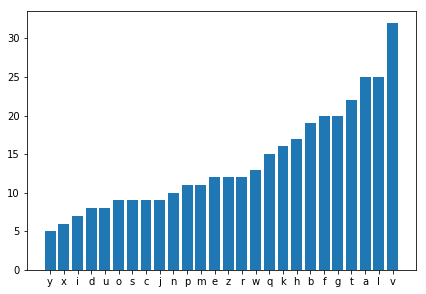

In [112]:
fc = collections.Counter(every_nth(srwcb, 12)[2])
plot_frequency_histogram(fc, sort_key=fc.get)

In [113]:
chunks(srwcb, 12)

['ycerevvtltfi',
 'ewhxbxxalvfa',
 'anfkmzkjvvhd',
 'svdyqlnlerhl',
 'nghkaiocsnqz',
 'eiocavghaabg',
 'hzoebajclrgc',
 'umsnqwalgclp',
 'drbvqxtvwjgv',
 'ljaqbgxrgmhz',
 'ayqamkkmvgal',
 'izfkjylnqril',
 'kxbkhphjksty',
 'hpavuvedizfa',
 'evzwrfqaqwxw',
 'oafaljtzwzke',
 'ntgceqihguzk',
 'artwmxnlhptc',
 'sucthihqhvja',
 'ekkjtfevvrpz',
 'ntsabgazlkrp',
 'pthezuwlwdoa',
 'bvctemhrhjjr',
 'driljwpgzwzl',
 'ruhhdnqstrar',
 'dotsowzlitle',
 'tapvbilivjza',
 'exaljtfkttvc',
 'rizlhrnggivf',
 'tnmaasrirych',
 'talquonahtya',
 'egclphrbvinn',
 'rdkynqrilerq',
 'ewaauclrgcwm',
 'iayxzvavvtcd',
 'itpllawtvjlw',
 'umkikczduvga',
 'iazlpwmfxkry',
 'ehezmilfkjyp',
 'adhvjslfmlbc',
 'snjzfhgxivjs',
 'lwdgamnleucr',
 'anqesrvzvfam',
 'nfzhvzpzglma',
 'emzctdzwsnqw',
 'hlqafrlpstya',
 'eqqrulvvetvc',
 'rizlhrvaokfj',
 'ervvthzralhd',
 'ycbehumlxhdn',
 'dvltrmdvtzal',
 'mqrpctvjddht',
 'talcacnghset',
 'arfihqwaljtf',
 'tfaglejprtlk',
 'oaqgctlsleav',
 'uanaalcrhcor',
 'ewcsvnnqepbr',
 'stsrvzfvnwhw

In [114]:
# hill_matrix = [[1] * (i + 1) + [0] * (12 - (i + 1)) for i in range(12)]
# hill_matrix

In [47]:
hill_matrix = [list(reversed([0] * (12 - (i + 1)) + [1, 1] + [0] * 12))[-12:] for i in range(12)]
hill_matrix

[[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1]]

In [48]:
hill_decipher(hill_matrix, srwcb)

'yearningforrespitetheromanssufferedasdaysturnedintoweeksandweeksintomonthswithcalgacusandthecaledoniiperfectlycontenttolaysiegeintheirownlandourknowledgeofthisdreadfulperiodcomesfromthefollowingaccountbymarcusfideliuscatoundersiegeforninelongmonthstrappedbywallswebuilttodefendourselvesherdedandpennedlikesheepwithinourrefugethefortatcarridenagainstusisarrayedthemightofthecaledonianarmyandournemesiscalgacusisgrinningwhilehewatchesussquirminthishellbetrayedbyourownleadersalustiusvolunteersallsomanygoodandbraveromanshavelosttheirlivesandthemoraleofthemenhereatcarridenisworseningbythedayexhaustedandstarvingthemencatchwhattheycantoeataroundthefortmostlyratssomecatsalthoughtheytooareskinandbonesbravebutdesperatesomespeakprivatelyofamutinytooverthrowsalustiusandiamtemptedtoagreewiththemevensoforallhisfaultssalustiusisstillaromanandiamunderhiscommandexhaustedthoughiambeingaromanstillmeanssomethingtomeevensofarawayfromlatiumanditsglorioussunneverthelessifearthatsoonthemenwillturntodarkerandmore

In [49]:
repunctuate(hill_decipher(hill_matrix, srwcb), pub)

'YEARNING FOR RESPITE THE ROMANS SUFFERED AS DAYS TURNED INTO WEEKS AND WEEKS INTO MONTHS, WITH CALGACUS AND THE CALEDONII PERFECTLY CONTENT TO LAY SIEGE IN THEIR OWN LAND. OUR KNOWLEDGE OF THIS DREADFUL PERIOD COMES FROM THE FOLLOWING ACCOUNT BY MARCUS FIDELIUS CATO.“ UNDER SIEGE FOR NINE LONG MONTHS, TRAPPED BY WALLS WE BUILT TO DEFEND OURSELVES. HERDED AND PENNED LIKE SHEEP WITHIN OUR REFUGE, THE FORT AT CARRIDEN. AGAINST US IS ARRAYED THE MIGHT OF THE CALEDONIAN ARMY, AND OUR NEMESIS CALGACUS IS GRINNING WHILE HE WATCHES US SQUIRM IN THIS HELL, BETRAYED BY OUR OWN LEADER SALUSTIUS. VOLUNTEERS ALL, SO MANY GOOD AND BRAVE ROMANS HAVE LOST THEIR LIVES, AND THE MORALE OF THE MEN HERE AT CARRIDEN IS WORSENING BY THE DAY. EXHAUSTED AND STARVING THE MEN CATCH WHAT THEY CAN TO EAT AROUND THE FORT, MOSTLY RATS, SOME CATS, ALTHOUGH THEY TOO ARE SKIN AND BONES. BRAVE BUT DESPERATE, SOME SPEAK PRIVATELY OF A MUTINY TO OVERTHROW SALUSTIUS, AND I AM TEMPTED TO AGREE WITH THEM. EVEN SO, FOR ALL H

In [50]:
autokey_decipher(srwcb[:12], 'a')

'yearningforr'

In [51]:
pb = repunctuate(cat(autokey_decipher(c, 'a') for c in chunks(srwcb, 12)), pub)
pb

'YEARNING FOR RESPITE THE ROMANS SUFFERED AS DAYS TURNED INTO WEEKS AND WEEKS INTO MONTHS, WITH CALGACUS AND THE CALEDONII PERFECTLY CONTENT TO LAY SIEGE IN THEIR OWN LAND. OUR KNOWLEDGE OF THIS DREADFUL PERIOD COMES FROM THE FOLLOWING ACCOUNT BY MARCUS FIDELIUS CATO.“ UNDER SIEGE FOR NINE LONG MONTHS, TRAPPED BY WALLS WE BUILT TO DEFEND OURSELVES. HERDED AND PENNED LIKE SHEEP WITHIN OUR REFUGE, THE FORT AT CARRIDEN. AGAINST US IS ARRAYED THE MIGHT OF THE CALEDONIAN ARMY, AND OUR NEMESIS CALGACUS IS GRINNING WHILE HE WATCHES US SQUIRM IN THIS HELL, BETRAYED BY OUR OWN LEADER SALUSTIUS. VOLUNTEERS ALL, SO MANY GOOD AND BRAVE ROMANS HAVE LOST THEIR LIVES, AND THE MORALE OF THE MEN HERE AT CARRIDEN IS WORSENING BY THE DAY. EXHAUSTED AND STARVING THE MEN CATCH WHAT THEY CAN TO EAT AROUND THE FORT, MOSTLY RATS, SOME CATS, ALTHOUGH THEY TOO ARE SKIN AND BONES. BRAVE BUT DESPERATE, SOME SPEAK PRIVATELY OF A MUTINY TO OVERTHROW SALUSTIUS, AND I AM TEMPTED TO AGREE WITH THEM. EVEN SO, FOR ALL H

In [52]:
open('8b.plaintext', 'w').write(pb)

5372

In [53]:
ppub = depunctuate(pb)
spb = sanitise(pb)

In [54]:
akb = cat(autokey_encipher(c, 'a') for c in chunks(spb, 12))
akb

'ycerevvtltfiewhxbxxalvfaanfkmzkjvvhdsvdyqlnlerhlnghkaiocsnqzeiocavghaabghzoebajclrgcumsnqwalgclpdrbvqxtvwjgvljaqbgxrgmhzayqamkkmvgalizfkjylnqrilkxbkhphjkstyhpavuvedizfaevzwrfqaqwxwoafaljtzwzkentgceqihguzkartwmxnlhptcsucthihqhvjaekkjtfevvrpzntsabgazlkrppthezuwlwdoabvctemhrhjjrdriljwpgzwzlruhhdnqstrardotsowzlitletapvbilivjzaexaljtfkttvcrizlhrnggivftnmaasrirychtalquonahtyaegclphrbvinnrdkynqrilerqewaauclrgcwmiayxzvavvtcditpllawtvjlwumkikczduvgaiazlpwmfxkryehezmilfkjypadhvjslfmlbcsnjzfhgxivjslwdgamnleucranqesrvzvfamnfzhvzpzglmaemzctdzwsnqwhlqafrlpstyaeqqrulvvetvcrizlhrvaokfjervvthzralhdycbehumlxhdndvltrmdvtzalmqrpctvjddhttalcacnghsetarfihqwaljtftfaglejprtlkoaqgctlsleavuanaalcrhcorewcsvnnqepbrstsrvzfvnwhwptvrtxwgaqwheekzgzdvtxpjotfmgnbvlrhcvzvkayfkoslfslbcmsnqlimfeqbixhwhogxveaebaaalqqzznfgttfrlwspaffufelkslfmlicmaaklbtwlroamnnnqlimghdhvypauqaymndhbehumlxhwaoianpimnfmvtarfamnflbtwxeenfkgaqxapvgzhaqizzrfgtarrwwydwfaxltbcgmnqlblyrofzwimkmharzevkalppwkanjarkahtlgcbgaeqqrjetwenlethrdrbovrnqpofv

In [55]:
akpb = repunctuate(akb, ppub)
akpb

'YCEREVVT LTF IEWHXBX XAL VFAANF KMZKJVVH DS VDYQ LNLERH LNGH KAIOC SNQ ZEIOC AVGH AABGHZ, OEBA JCLRGCUM SNQ WAL GCLPDRBVQ XTVWJGVLJ AQBGXRG MH ZAY QAMKK MV GALIZ FKJ YLNQ. RIL KXBKHPHJK ST YHPA VUVEDIZF AEVZWR FQAQW XWOA FAL JTZWZKENT GCEQIHG UZ KARTWM XNLHPTCS UCTH.“ IHQHV JAEKK JTF EVVR PZNT SABGAZ, LKRPPTH EZ UWLWD OA BVCTE MH RHJJRD RILJWPGZW. ZLRUHH DNQ STRARD OTSO WZLIT LETAPV BIL IVJZAE, XAL JTFK TT VCRIZLHR. NGGIVFT NM AA SRIRYCH TAL QUONA HT YAE GCLPHRBVIN NRDK, YNQ RIL ERQEWAA UCLRGCWM IA YXZVAVVT CDITP LL AWTVJLW UM KIKCZD UV GAIA ZLPW, MFXKRYEH EZ MIL FKJ YPADHV JSLFMLBCS. NJZFHGXIVJ SLW, DG AMNL EUCR ANQ ESRVZ VFAMNF ZHVZ PZGL MAEMZ CTDZW, SNQ WHL QAFRLP ST YAE QQR ULVV ET VCRIZLHR VA OKFJERVVT HZ RAL HDY. CBEHUMLXH DND VLTRMDVT ZAL MQR PCTVJ DDHT TALC ACN GH SET ARFIHQ WAL JTFT, FAGLEJ PRTL, KOAQ GCTL, SLEAVUAN AALC RHC ORE WCSV NNQ EPBRS. TSRVZ FVN WHWPTVRTX, WGAQ WHEEK ZGZDVTXPJ OT F MGNBVL RH CVZVKAYFK OSLFSLBCM, SNQ L IM FEQBIXH WH OGXVE AEBA AALQ. QZZN FG, TTF RLW S

In [56]:
rwakpb = wcat(cat(reversed(w)) for w in cat(c for c in akpb if c in list(string.ascii_letters) + [' ']).split())
rwakpspb = repunctuate(sanitise(rwakpb), ppub)
rwakpspb

'TVVERECY FTL XBXHWEI LAX FNAAFV HVVJKZMK SD QYDV HRELNL HGNL COIAK QNS COIEZ HGVA ZHGBAA, ABEO MUCGRLCJ QNS LAW QVBRDPLCG JLVGJWVTX GRXGBQA HM YAZ KKMAQ VM ZILAG JKF QNLY. LIR KJHPHKBXK TS APHY FZIDEVUV RWZVEA WQAQF AOWX LAF TNEKZWZTJ GHIQECG ZU MWTRAK SCTPHLNX HTCU.“ VHQHI KKEAJ FTJ RVVE TNZP ZAGBAS, HTPPRKL ZE DWLWU AO ETCVB HM DRJJHR WZGPWJLIR. HHURLZ QND DRARTS OSTO TILZW VPATEL LIB EAZJVI, LAX KFTJ TT RHLZIRCV. TFVIGGN MN AA HCYRIRS LAT ANOUQ TH EAY NIVBRHPLCG KDRN, QNY LIR AAWEQRE MWCGRLCU AI TVVAVZXY PTIDC LL WLJVTWA MU DZCKIK VU AIAG WPLZ, HEYRKXFM ZE LIM JKF VHDAPY SCBLMFLSJ. JVIXGHFZJN WLS, GD LNMA RCUE QNA ZVRSE FNMAFV ZVHZ LGZP ZMEAM WZDTC, QNS LHW PLRFAQ TS EAY RQQ VVLU TE RHLZIRCV AV TVVREJFKO ZH LAR YDH. HXLMUHEBC DND TVDMRTLV LAZ RQM JVTCP THDD CLAT NCA HG TES QHIFRA LAW TFTJ, JELGAF LTRP, QAOK LTCG, NAUVAELS CLAA CHR ERO VSCW QNN SRBPE. ZVRST NVF XTRVTPWHW, QAGW KEEHW JPXTVDZGZ TO F LVBNGM HR KFYAKVZVC MCBLSFLSO, QNS L MI HXIBQEF HW EVXGO ABEA QLAA. NZZQ GF, FTT WLR A

In [57]:
cb == rwakpspb

True

In [58]:
import re
wcat(segment(cat(sanitise(s)[0] for s in re.split('[\.?!]', pb) if s)))

'you have been betrayed by midas this is a forgery'